In [68]:
import numpy as np 
import pandas as pd

In [69]:
with open("spam.csv", "r", encoding="utf-8", errors="ignore") as f:
    df = pd.read_csv(f)


In [70]:
df.shape

(5572, 5)

In [71]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [72]:
#data cleaning
#EDA
#Text preprocessing
#model building
#evaluation 
#improvement
#website 
#heroku

Data Cleaning


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [74]:
#drop last 3 columns 

In [75]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"], inplace = True)

In [76]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will _ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [77]:
#renaming the columns 

In [78]:
df.rename(columns={"v1" : "target" , "v2" : "text"},inplace= True)

In [79]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [80]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will _ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [81]:
df['target'] = encoder.fit_transform(df['target'])


In [82]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [83]:
#check the missing values

In [84]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [85]:
#check for duplicate values

In [86]:
df.duplicated().sum()

404

In [87]:
df = df.drop_duplicates(keep = "first")

In [88]:
df.duplicated().sum()

0

In [89]:
df.shape

(5168, 2)

EDA #analysis of data 

In [90]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [91]:
df['target'].value_counts()

target
0    4516
1     652
Name: count, dtype: int64

In [92]:
import matplotlib.pyplot as plt

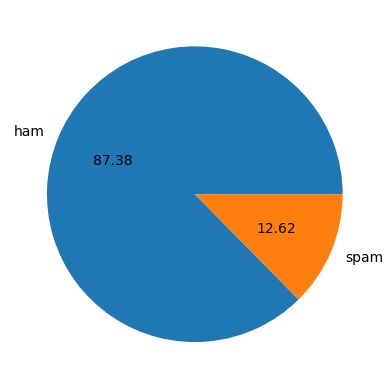

In [93]:
plt.pie(df["target"].value_counts() , labels=['ham','spam'] , autopct='%0.2f')
plt.show()

In [94]:
#data is imbalance

In [95]:
import nltk #natural language processing

In [96]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sharm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [97]:
df['num_character'] = df['text'].apply(len) #number of characters used

C:\Users\sharm\AppData\Local\Temp\ipykernel_26924\2514719807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_character'] = df['text'].apply(len) #number of characters used


In [98]:
df = df.drop(columns = ["character"])

KeyError: "['character'] not found in axis"

In [99]:
df

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,159
5568,0,Will _ b going to esplanade fr home?,36
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [100]:
#number of words

In [101]:
df["num-words"] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

C:\Users\sharm\AppData\Local\Temp\ipykernel_26924\1647606470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num-words"] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))


In [102]:
df

,target,text,num_character,num-words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,159,35
5568,0,Will _ b going to esplanade fr home?,36,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [103]:
df.head()

,target,text,num_character,num-words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [104]:
df['num_sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

C:\Users\sharm\AppData\Local\Temp\ipykernel_26924\878202491.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))


In [105]:
df

,target,text,num_character,num-words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,159,35,4
5568,0,Will _ b going to esplanade fr home?,36,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [106]:
import seaborn as sns 

<Axes: xlabel='num_character', ylabel='Count'>

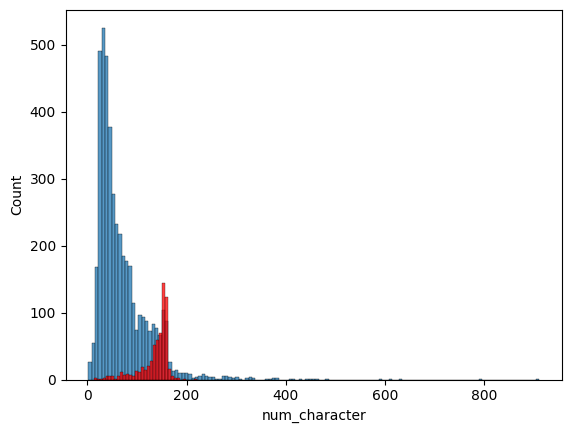

In [107]:
sns.histplot(df[df["target"] == 0]['num_character'])
sns.histplot(df[df["target"] == 1]['num_character'],color= 'red')

C:\Users\sharm\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\sharm\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\sharm\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


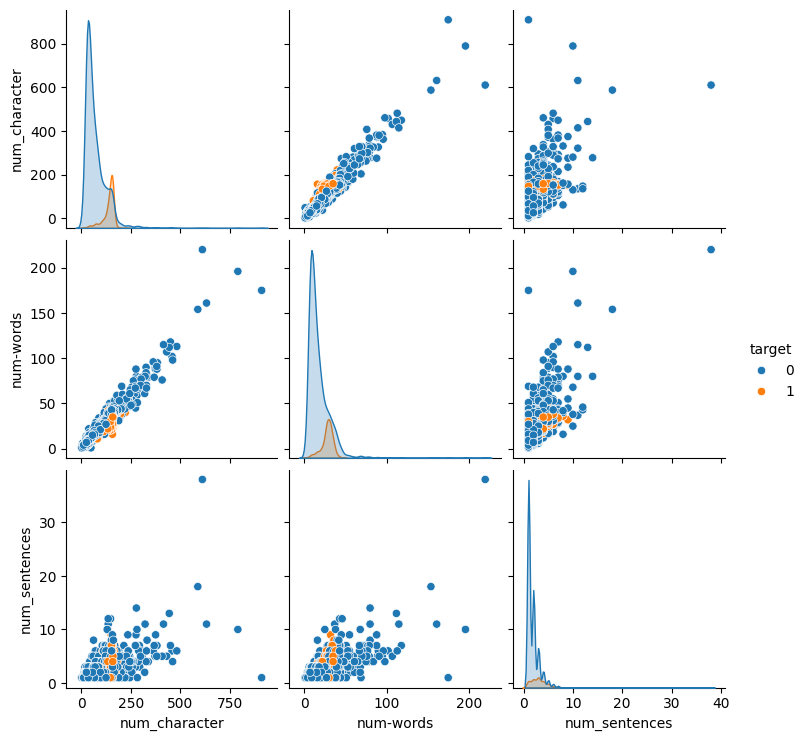

In [108]:
sns.pairplot(df,hue='target')

In [109]:
#data preprocessing
#lowercase, tokenization , remove special characters, remove stop words, stemming 

In [110]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [111]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
ps.stem("loving")

'love'

In [112]:
import string
def transform_text(text) : 
    text = text.lower()
    text = nltk.word_tokenize(text)  #the text has come in the list
    y=[]
    for i in text: 
        if i.isalnum(): #special character are removed
            y.append(i)

    text = y[:] 
    y.clear() 
    for i in text : 
        if i not in stopwords.words('english') and i not in string.punctuation : 
            y.append(i)

    text = y[:]
    y.clear()
    for i in text : 
        y.append(ps.stem(i)) 



    return " ".join(y)

In [113]:
transform_text("hi! , HOW are you Prateek? #?")

'hi prateek'

In [119]:
df['transformed_text'] = df['text'].apply(transform_text)

C:\Users\sharm\AppData\Local\Temp\ipykernel_26924\283536690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [120]:
df.head()

,target,text,num_character,num-words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [121]:
#sabse important words spam and hams ka 

In [129]:
from wordcloud import WordCloud
wc = WordCloud(width = 500 , height=500, min_font_size=10 ,background_color='white') 

In [130]:
spam_word_cloud = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep =' '))

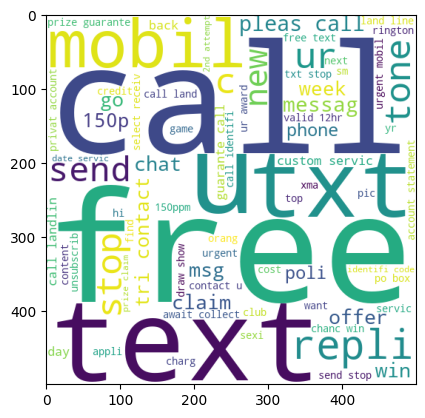

In [131]:
plt.imshow(spam_word_cloud)

In [132]:
ham_word_cloud = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep =' '))

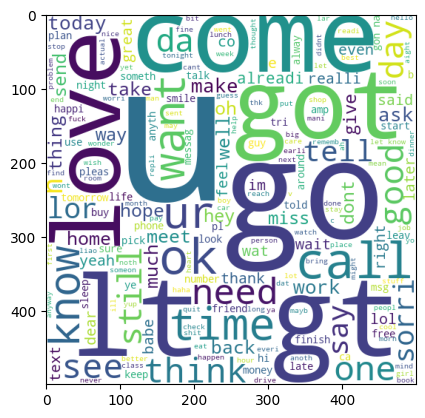

In [133]:
plt.imshow(ham_word_cloud)

In [134]:
df.head()

,target,text,num_character,num-words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [141]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist() : 
    # print(msg)
    for word in msg.split() : 
        spam_corpus.append(word)

In [142]:
len(spam_corpus)

10106

In [146]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

In [147]:
ham_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist() : 
    # print(msg)
    for word in msg.split() : 
        ham_corpus.append(word)

In [148]:
len(ham_corpus)

10106

In [150]:
#MODEL BUILDING , NAIVE BASIS ALGORITHM (BEST FOR TEXT CLASSIFICATION)

In [151]:
#FIRST WE WILL VECTORIZE 

In [215]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv= CountVectorizer() #vectorization of data because for naive base we need numbers not words , this one is bag of words
tfidf = TfidfVectorizer(max_features=3000)

In [216]:
# X = cv.fit_transform(df['transformed_text']).toarray()
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [217]:
X.shape

(5168, 3000)

In [218]:
y = df['target'].values

In [219]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [220]:
from sklearn.model_selection import train_test_split

In [221]:
X_train, X_test , y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [222]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix , precision_score

In [223]:
gnb  = GaussianNB()
mnb = MultinomialNB() 
bnb = BernoulliNB()


In [224]:
gnb.fit(X_train,y_train) 
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1)) 
print(precision_score(y_test,y_pred1))

0.8752417794970987
[[791 102]
 [ 27 114]]
0.5277777777777778


In [225]:
mnb.fit(X_train,y_train) 
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2)) 
print(precision_score(y_test,y_pred2))

0.9700193423597679
[[893   0]
 [ 31 110]]
1.0


In [226]:
bnb.fit(X_train,y_train) 
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3)) 
print(precision_score(y_test,y_pred3))

0.9796905222437138
[[892   1]
 [ 20 121]]
0.9918032786885246


In [227]:
#model improve  